# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

*Notes:* 

- Solve the questions with python.

- Round the final answer to three decimal places.

In [364]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from scipy.stats import bernoulli
from scipy.stats import binom
import math

## Bernoulli's Distribution

In a basket containing 100 fruits, there are 60 apples and 40 oranges. 

A fruit is picked randomly from the basket. 

1. **What is the probability that the fruit is apple?**
1. **What is the probability that it is an orange?**

In [60]:
'''
Calculate:
p = probability that the fruit is an apple 
q = probability that the fruit is an orange

p = 60/100 = 0.6
q = 40/100 = 0.4
'''
# your code here

p = 0.6
q = 0.4

Now we take a random sample of 20 fruits from the basket. After each fruit is taken, a new fruit of the same type is replaced in the basket. Therefore, every time we are taking 1 fruit from 100 fruits. 

1. **What is the probability that the first 5 fruits are all apples?**

1. **What is the probability that the first 5 fruits are all apples and the next 15 fruits are all oranges?**

You can include the `p` and `q` probabilities you previous calculated in your solution.

In [61]:
'''
1. First 5 fruits have to be either all apples or statement is false. Therefore, Bernoulli Distri-
bution can be applied in there.

Probability does not change even to event so p = 0.6 and q = 0.4
'''

# Question 1 
first_5_apple = round((p)**5,3)
print(f"Probability that the first 5 fruits are all apples is: {first_5_apple}")


# Question 2 
five_A_15_O = ((p)**5) * ((q)**15)
print(f"Probability that the first 5 fruits are all apples and rest is orange is: {five_A_15_O}")

Probability that the first 5 fruits are all apples is: 0.078
Probability that the first 5 fruits are all apples and rest is orange is: 8.349416423424006e-08


In [43]:
round(first_5_apple,3)

0.078

### Binomial Distribution

Similar to the above problem, this time again we randomly sample 20 fruits.

**What is the probability that this time the sample contains 5 apples and 15 oranges?**

Please note that this time the order of the fruits being picked does not matter.

In [62]:
'''
n: number of events -- > 20
x: success -- > 5 APPLE and 15 ORANGE
p: probability -- > p = 0.6 , q= 0.4

A O A O ...
A A A O ...
.
.
.

So actually, we already calculate this probability but since this time order does not matter
we have to multiply by their combination since we'll have that many outcomes in this case.

nCx = 20!/(15!*5!)
P(X=x) = nCx * p^(x) * (1-p)^(n-x)
'''

p_not_ordered =  ((20*19*18*17*16) / (5*4*3*2*1)) * five_A_15_O 
print(f"Probability that sample contains 5 apples and 15 oranges is: {p_not_ordered}")

Probability that sample contains 5 apples and 15 oranges is: 0.0012944935222876579


In the lesson we also discussed CDF (cumulative distribution function). In the context of the above problem, **what is the probability that less than 5 fruits picked are apples?**

Write the formula and calculate the probability below.

In [176]:
#binomial = binom(20,0.6).pmf([i for i in range(20)])

In [207]:
'''
CDF = Sum of probabilities up to 4 fruits are apple.
'''
n = 20      # number of events
k = 4       # events up to 4 (1st+2nd+3rd+4th) - in other words area under pmf graph up to 4
p = 0.6     # success rate

cdf_4apple= binom.cdf(n=20,k=4,p=0.6)
cdf_4apple_perc = round((binom.cdf(n=20,k=4,p=0.6))*100,4)
print(f"Probability that less than 5 fruits are apples is: {cdf_4apple_perc}%")

Probability that less than 5 fruits are apples is: 0.0317%


**Plot the PDF (probability distributiom function) for the above binomial distribution.**

*Hint: The range of x in a binomial distribution is from `0` to `n`.*

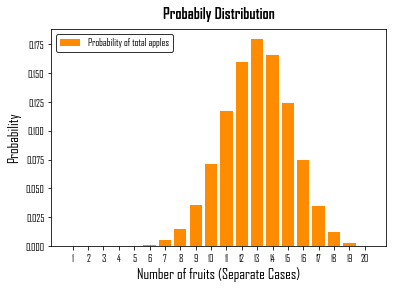

"\nTRUE!\n\nThanks a lot Paolo. It's much more clear in my head now, indeed I need to create a loop to plot each\npossibility for each separate cases below. \n\nAnd their sum (first four cases) is equal to CMF of 4 which in the same line with our expectations.\n"

In [362]:
# your code here
# Please label the axes and give a title to the plot
x = np.arange(0,20)
n = 20         # Number of events
p = 0.6        # Success rate

# k is defined below for each cases by using list comprehension.

plt.rcParams["font.family"] = "agency fb"
fig, ax = plt.subplots(1, 1)
probs = [binom.pmf(k,n,p) for k in range(20)]
ax.bar(x, probs,color="darkorange",label="Probability of total apples")
ax.grid(False)
ax.set_xlabel("Number of fruits (Separate Cases)",size=15)
ax.set_ylabel("Probability",size=15)
ax.set_title("Probabily Distribution",fontweight="bold",size=15,pad=10)
ax.set_xticks(np.arange(20))
ax.set_xticklabels([i for i in range(1,21)])
plt.legend(loc="upper left",edgecolor="k")
plt.show()

'''
Quick check if sum of first 4 cases equals to CMF above which is 0.0317%;
'''
lst = []
for k in range(1,5):
    prob_case = binom.pmf(k,n,p)
    lst.append(prob_case)
result = sum(lst)

round((result)*100,4) == cdf_4apple_perc

'''
TRUE!

Thanks a lot Paolo. It's much more clear in my head now, indeed I need to create a loop to plot each
possibility for each separate cases below. 

And their sum (first four cases) is equal to CMF of 4 which in the same line with our expectations.
'''

## Poisson Distribution

In this challenge you are required to use the Math library in python to solve the problems.

In the UEFA champions league tournament, the average number of goals scored in a match is 2.3. 

**What is the probability that the number of goals scored in a match is 5?**

*Hint: Use the exp() in the math library*

And to calculate the factorial, you can use the following code:

```python
import math
math.factorial(n) # n is the number you want to find the factorial of
```

In [381]:
print(((lambda_poisson**3)*((np.exp(1))**(-3)))/(3*2*1))


lambda_poisson = 2.3 * 2 
poisson = stats.poisson(lambda_poisson)
poisson.pmf(3)

0.8076790144424009


0.1630675806732757

In [383]:
np.exp(1)

2.718281828459045

In [443]:
'''
lambda (l) = mean
x = number of occurency

Poisson's probability dist func = ( (l^(x)) * (e^(-l)) ) /  x!
'''
l = 2.3   # mean
x = 5     # probability of 5 goals

lambda_poisson = 2.3 
poisson = stats.poisson(lambda_poisson)
poisson.pmf(5)

0.053775025581946814

**Draw a poisson probability distribution plot for the number of goals to be between 0 to 10.**

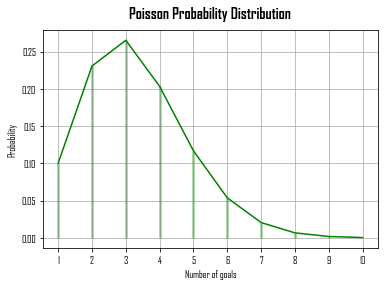

In [451]:
# your code here
# Please label the axes and give a title to the plot 

x= np.arange(0,10)
fig, ax = plt.subplots(1, 1)
ax.plot(x, poisson.pmf(x),'g')#,ms=1,label='poisson pmf')
ax.vlines(x, 0, poisson.pmf(x), colors='g', lw=3, alpha=0.3)
ax.set_xlabel('Number of goals')
ax.set_ylabel('Probability')
ax.set_title("Poisson Probability Distribution",size=15,fontweight="bold",pad=12)
ax.set_xticks(np.arange(0,10))
ax.set_xticklabels([i for i in range(1,11)])
plt.show
plt.grid(True)